# __Projet Maths-Info #2 : Choix du pas de temps__

Binôme: Julien LAVAL et Nathan LINÉ.

Ce notebook traite de l'adaptation du pas de temps lors de la résolution approchée d'équations différentielles linéaires.

Tout d'abord, on importe les librairies Python dont on aura besoin : 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Pas fixe 

On note $x_0 = x(t_0)~$ la condition initiale, $dt$ le pas de temps fixe, $f~$ la fonction telle que $\dot x(t) = f(x,t)$, et enfin $t_{max}$ la valeur maximale de l'intervalle sur lequel la solution approchée est calculée.

### Schéma d'Euler explicite :

#### Fonction : 

In [2]:
def solve_euler_explicit(f, x0, dt, t0, tmax):
    x, t = [], []
    xi, ti = x0, t0
    N = int((tmax - t0)/dt) + 1 # Nombre de pas
    for loop in range(N):
        x.append(xi)
        t.append(ti)
        xi += dt*f(ti, xi)
        ti += dt
    return t, x

#### Test :

On considère l'équation différentielle $\dot x = ax$, avec $a \in \mathbb{R}.$  
La solution est $x: t \rightarrow e^{ax}$. Pour l'exemple, nous prendront ici $a = 1$ : nous avons alors $f = Id$.

In [80]:
def f(t, x):
    return x

In [4]:
t0, tmax = 0, 10
x0 = np.exp(t0)
dts = [1, 1/2, 1/4, 1/8, 1/16] # Différents pas de temps, décroissants.

On teste le solveur pour l'équation différentielle, avec différents pas de temps :

 écart maximal pour dt = 1 : 21000
 écart maximal pour dt = 0.5 : 18700
 écart maximal pour dt = 0.25 : 14500
 écart maximal pour dt = 0.125 : 9660
 écart maximal pour dt = 0.0625 : 5710


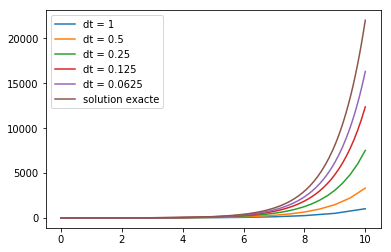

In [5]:
# Solutions approchées : 
for i in range(len(dts)):
    t, x = solve_euler_explicit(f, x0, dts[i], t0, tmax)
    x_exact = np.exp(t)
    y = abs(x-x_exact)
    
    plt.plot(t, x, label = f'dt = {dts[i]}')
    print(f' écart maximal pour dt = {dts[i]} : {int(round(max(y),-1))}')

# Solution exacte :
x_exact = np.exp(t)
plt.plot(t, x_exact, label = 'solution exacte') # Tracé avec le plus grand nombre de points des solutions approchées.


plt.legend()
plt.show()

On remarque que l'écart maximal est bien décroissant lorsque $dt$ décroit, ce qui peut amener à penser qu'il tendra vers 0 lorsque $dt \rightarrow 0$.  
La méthode semble bien convergente sur cet exemple.

### Méthode d'ordre 2 : Heun

#### Fonction 

In [6]:
def solve_heun_explicit(f, x0, dt, t0, tmax):
    x, t = [], []
    xi, ti = x0, t0
    N = int((tmax - t0)/dt) + 1 # Nombre de pas
    for loop in range(N):
        x.append(xi)
        t.append(ti)
        xi += dt/2*(f(ti, xi) + f(ti + dt, xi + dt*f(ti,xi))) # méthode de Heun
        ti += dt
    return t, x

#### Test

Avec toujours la même équation différentielle, on a : 

 écart maximal pour dt = 1 : 12490
 écart maximal pour dt = 0.5 : 5540
 écart maximal pour dt = 0.25 : 1830
 écart maximal pour dt = 0.125 : 520
 écart maximal pour dt = 0.0625 : 140


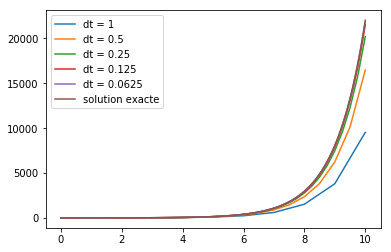

In [7]:
# Solutions approchées : 
for i in range(len(dts)):
    t, x = solve_heun_explicit(f, x0, dts[i], t0, tmax)
    x_exact = np.exp(t)
    y = abs(x-x_exact)
    
    plt.plot(t, x, label = f'dt = {dts[i]}')
    print(f' écart maximal pour dt = {dts[i]} : {int(round(max(y),-1))}')

# Solution exacte :
x_exact = np.exp(t)
plt.plot(t, x_exact, label = 'solution exacte') # Tracé avec le plus grand nombre de points des solutions approchées.


plt.legend()
plt.show()

De même, la convergence semble assurée par le fait que l'écart maximal soit décroissant majoré par 0. Cependant, on observe alors une convergence plus rapide que pour la méthode d'ordre 1.

Utilisons une base décimale pour comparer la variation de l'écart maximale en fonction du pas : 

In [8]:
dtsp = [1, 0.1, 0.01, 0.001, 0.0001]

In [9]:
# Solutions approchées : 
for i in range(len(dts)):
    t1, x1 = solve_euler_explicit(f, x0, dtsp[i], t0, tmax)
    t2, x2 = solve_heun_explicit(f, x0, dtsp[i], t0, tmax)
    x_exact = np.exp(t1)
    y1 = abs(x1-x_exact)
    y2 = abs(x2-x_exact)
    
    print(f'dt = {dtsp[i]} : Euler :{round(max(y1), 5)}, Heun :{round(max(y2), 5)} ')

dt = 1 : Euler :21002.46579, Heun :12489.72263 
dt = 0.1 : Euler :8245.85345, Heun :338.05142 
dt = 0.01 : Euler :1067.31016, Heun :3.64335 
dt = 0.001 : Euler :109.78446, Heun :0.03668 
dt = 0.0001 : Euler :11.00975, Heun :0.00037 


Comme vu auparavant, les deux méthodes semblent avoir un écart max qui tend vers 0 lorsque dt tend vers 0.   
Cependant, pour la méthode d'Euler, l'écart max est environ divisé par 10 lorsque le pas l'est, alors qu'il est environ divisé par 100 lorsque le pas est divisé par 10 dans la méthode de Heun. On retrouve une méthode d'Euleur d'ordre 1, en O($dt$) et une méthode de Heun d'ordre 2, en O($dt^2$).

## Adaptation du pas de temps

$\diamond$ Soit $f $  une fonction $\mathcal{C}^1$, associée à un schéma d'Euleur explicite.

$\triangleright$ L'erreur locale est donnée par :  
$ e^{j+1} = (\, z^{j} + \int_{t_{j}}^{t_{j+1}} f(s,z(s)) \, \mathrm{d}s \,)  - x^{j+1}, \; $ où $z$ est solution de :  
$\left \lbrace
\begin{array}{rl}
    z(t)  & = f(t,z(t))\\
    z(t_{j}) &= x^{j}\\
\end{array}
\right.$  

d'où : $e^{j+1} = z(t_{j+1}) - x^{j+1}$  

Comme $f$ est $\mathcal{C}^1$, $z$ est $\mathcal{C}^2$ et son développement de Taylor autour de $t_j$ évalué en $t_{j+1}$ donne :  
$z(t_{j+1}) = z(t_{j}) + \Delta t_{j} \frac{dz}{dt} (t_{j})  + \frac{\Delta t_{j}^{2}}{2} \frac{d^{2}z}{dt^{2}}(t_{j}) + O (\Delta t_{j}^{3})$  
$= x^{j+1} + \frac{\Delta t_{j}^{2}}{2} \frac{d^{2}z}{dt^{2}}(t_{j}) + O (\Delta t_{j}^{3}) \;$ par définition de z.     
Ainsi, $e^{j+1} = \frac{\Delta t_{j}^{2}}{2} \frac{d^{2}z}{dt^{2}}(t_{j}) + O (\Delta t_{j}^{3})$  

Soit $\Phi : t \to f(t,x(t))$, $\,$ qui est $\mathcal{C}^1$.  
$\dfrac{d^{2}z}{dt^{2}}(t_{j}) = \Phi'(t_{j})\\ 
\; \; \; \; \; \; \, \; \; \; \;= df(t_j, \,z(t_j))\;(1, \, \dfrac{dz}{dt}(t_j))\\
\; \; \; \; \; \; \, \; \; \; \;= df(t_j, \,z(t_j))) \; (1, \, f(t_j)) \\
\; \; \; \; \; \; \, \; \; \; \;= \partial_x f(t_j, \, x^j) + f(t_j) \partial_y f(t_j, \, x^j)$  

$\Rightarrow e^{j+1} = \frac{\Delta t_j^2}{2} (\partial_x f(t_j, \, x^j) + f(t_j) \partial_y f(t_j, x^j) ) + O(\Delta t_j^3)$.

$\triangleright$ Or $f(t_{j+1}, \, x^{j+1}) = f(t_j, \, x^j) + \Delta t_j \partial_x f (t_j, \,x^j) + (x^{j+1} - x^j) \partial_y f (t_j,\, x^j) + O(\Delta t_j^3) \quad$ par développement de Taylor à deux variables de $f$.
$\Rightarrow \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j)) = e^{j+1} + O(\Delta t_j^3)$  

Par seconde inégalité triangulaire,  
$ \left \vert \Vert \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j))\Vert - \Vert e^{j+1} \Vert \right \vert \leq \Vert \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j) - e^{j+1} \Vert = O(\Delta t_j^3)$  

donc $\boxed{\Vert e^{j+1} \Vert = \Vert \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j)) \Vert + O(\Delta t_j^3)}$  

$\diamond$ Selon la question précédente,  
$e^{j+1} = \frac{\Delta t_j^2}{2} (\partial_x f(t_j, \, x^j) + f(t_j) \partial_y f(t_j, \, x^j) ) + O(\Delta t_j^3)\\
\Rightarrow \boxed{e^{j+1} = O(\Delta t_j^2)}$


$\triangleright$ Justification de la stratégie de prendre $\Delta t_{new} = \Delta t \sqrt{\dfrac{Tol_{abs}}{\Vert e^{j+1} \Vert}}$ :  

On cherche à adapter le pas continuellement de telle sorte qu’il soit faible dans des zones où les erreurs risquent de s’accumuler rapidement (variations rapides de la fonction) mais plus élevé en dehors. A chaque itération, on estime l’erreur commise $\Vert e^{j+1} \Vert$ et si elle excède $Tol_{abs}$, alors on a besoin de diminuer le pas à l’itération suivante pour regagner en précision. Inversement, si l’erreur est faible (inférieure à $Tol_{abs}$) alors on peut se permettre d’augmenter le pas quitte à augmenter légèrement l’erreur commise. Ainsi si $\frac{Tol_{abs}}{\Vert e^{j+1} \Vert} > 1$, on augmente le pas, si $\frac{Tol_{abs}}{\Vert e^{j+1} \Vert} < 1$, on diminue le pas. On peut donc calculer le nouveau pas selon la formule $\Delta t_{new} = \Delta t (\dfrac{Tol_{abs}}{\Vert e^{j+1} \Vert})^{k}$ pour respecter l’approche qualitative. Il ne reste plus qu’à choisir la valeur de $k$ la plus adaptée. En effet, on veut éviter que le pas diminue trop car cela provoquerait des erreurs machines importantes et l’exécution serait trop lente, et à l’inverse une augmentation trop brutale du pas risquerait d’engendrer une erreur significative à l’itération suivante. On choisit $k$ de telle sorte que le pas reste du même ordre de grandeur entre deux dates successives. Comme d’après la question précédente $e^{j+1} = O(\Delta t_j^2)$, on peut dire que $\Vert e^{j+1} \Vert$ est de l’ordre de grandeur de $\Delta t_j^2$ (ça ne sera pas toujours le cas, mais c’est la meilleure approximation que l’on ait) et alors la valeur de $k$ qui conserve l’ordre de grandeur est $k = \frac{1}{2}$.  
Ainsi, la stratégie est cohérente.

$\diamond$ On reprend le code donné dans le notebook Equations Differentielles II.ipynb : 

In [10]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

$\triangleright$ Explication du solveur :  

$-$ Les différents paramètres d'entrée  de ce solveur sont les suivants :
* f : fonction dans le problème à résoudre
* t0, t_f : intervalle de temps sur lequel on résout l'équation différentielle 
* x0 : condition initiale dans le problème à résoudre
* dtmax : intervalle de temps global, de stockage des valeurs : les valeurs retenues ( $\neq$ valeurs calculées) sont espacées de ce pas de temps.
* dtmin : intervalle de temps minimal, en dessous duquel le pas est trop faible et le solveur trop long : on retourne une erreur
* atol : tolérance d'erreur locale $Tol_{abs}$

Le solveur commence par fixer un pas d'intégration de façon qualitative à dtmax/10, qui représentera le premier pas qui sera fait avant d'être adapté en fonction de l'erreur. Il créé ensuite deux listes $t_s$ et $x_s$ qui stockeront les temps de prise de valeurs $t_0, \, t_0 + dtmax, \, t_0 + 2 dtmax...$, ainsi que les estimations de la valeur de la fonction en ces temps.
La variable $t$ stocke le temps actuel où est effectuée l'estimation, alors que la variable $t_i$ stocke le temps depuis le dernier point de stockage, elle doit donc être comprise entre $0$ et $dtmax$. 

Première boucle while : on stocke des valeurs dans les deux listes tant que l'on reste dans l'intervalle $[t_0, t_f]$.

Deuxième boucle while : on avance localement dans l'un des intervalles. L'avancement dans l'intervalle est caractérisé par la valeur de $t_i$, et tant que $t_i$ est plus faible que $dtmax$, la boucle continue.  

$-$ Localement, dans un des intervalles, on avance avec la métode d'Euler explicite, en adaptant le pas selon la stratégie de la question précédente :  
A une itération $j$ donnée,  
$x = x^j$ et $x\_back = x^{j+1} - \Delta t_j f(x^{j+1}) = x^j + \Delta t_j f(x^j) - \Delta t_j f(x^{j+1})$  
$\Rightarrow x\_back - x = \Delta t_j (f(x^j) - f(x^{j+1}))$  
d'où : $\frac{\Vert x\_back - x \Vert}{2} = \frac{\Delta t_j}{2} \Vert f(x^{j+1}) - f(x^j) \Vert$ = $\Vert e^{j+1} \Vert + O(\Delta t_j^3)$  

or $\Vert e^{j+1} \Vert$ est en $O(\Delta t_j^2)$.  
Ainsi, dans l'algorithme, sqrt(ratio_abs_error) est bien équivalent à $\sqrt{\frac{Tol_{abs}}{\Vert e^{j+1} \Vert}}$, on applique bien la stratégie précédente.

$-$ Le fait de multiplier le pas par un facteur 0,9 à chaque itération semble correspondre à une mesure de surêté, pour s'assurer que si le pas devait rester à peu près constant, il diminuerait alors quand même pour avoir une évaluation plus précise.  
Cela semble légitime, puisque l'algorithme peut avoir d'autres sources d'erreurs non prises en compte par la stratégie d'adaptation, et qui vont s'accumuler lors du parcours d'un intervalle de longueur $dtmax$, comme par exemple le fait de faire des calculs sur des flottants. S'assurer que le pas décroit permet, en veillant tout de même à ce qu'il reste suffisamment grand, à s'assurer de garder une certaine précision vis à vis de ces autres sources d'erreurs.

$-$ L'algorithme assure de ne pas avoir un pas de temps trop faible, par une valeur minimale dtmin fixée en entrée, pour ne pas traiter un problème qui requierait un temps de calcul trop long.  
De plus, il assure aussi que chaque intervalle contient un nombre suffisant de point, par le teste $dt < \frac{dtmax}{2}$.

$-$ Une fois sorti de seconde boucle, la condition $t_i \geq dtmax$ est vérifiée : on est sorti de l'intervalle local d'évaluation. L'algorithme calcule alors le surplus $dt2DT = dtmax - t_i$, négatif par définition, afin de faire une méthode d'Euler depuis le point extérieur à l'intervalle vers l'arrière, pour évaluer la fonction au point souhaité, auquel $t_i = dtmax$.  

On stocke ensuite les valeurs du temps et de l'estimation dans $t_s, \, x_s$, puis $t_i$ est réinitialisé et la seconde boucle peut reprendre.  

$\boxed{\text{Ainsi, ce solveur applique la stratégie évoquée ci-dessus pour estimer la solution d'une équation différentielle avec un pas variable.}}$

$\triangleright$ Illustration du fonctionnement du solveur :  


Dans la suite, le solveur donné dans le notebook Equations Differentielles II.ipynb est légèrement modifié, pour pouvoir prendre en entrée une fonction $f(t,x)$ et non seulement $f(x)$ :

In [77]:
def solve_ivp_euler_explicit_variable_step_t(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t,x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (abs(x_back-x)/2)
            dt = 0.9 * dt * np.sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs)

$-$ On applique le solveur à l'exponentielle : $\dot x = x$, $f = Id$ : 

In [78]:
def g(t, x):
    return x

ts, xs = solve_ivp_euler_explicit_variable_step_t(g, 0, 1 , 10)

On compare la solution du solveur à celle obtenue avec un pas de temps fixe :

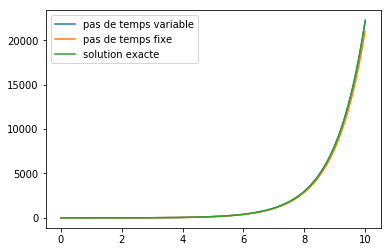

In [79]:
t1, x1 = solve_euler_explicit(g, 1, 0.01, 0, 10)

plt.plot(ts, xs, label = 'pas de temps variable') 
plt.plot(t1, x1, label = 'pas de temps fixe')
plt.plot(ts, np.exp(ts), label = 'solution exacte')
plt.legend()

$\triangleright$ Comme on pouvait le prévoir, l'écart est le plus important au niveau du côté droit de l'intervalle, là où le pas variable tend à diminuer alors que le pas fixe est contraint à rester le même. Les courbes de pas variable et de solution exacte se superposent dans la figure ci-dessus, le pas variable est donc plus précis sur cette solution.  

$\triangleright$ Cependant, cette méthode de pas variable peut devenir très longue à exécuter, comme le montre l'application de l'algorithme sur $[ 0,20 ]$ en gardant le $dtmin$ par défaut. Ainsi, il faut veiller à bien adapter le pas minimal à notre problème, et se demander si une telle méthode de pas qui varie est intéressante ou non selon la nature du problème à modéliser.

$-$ On applique le solveur à une gaussienne centrée:  

Le but est d'avoir une grande variation locale de la fonction, et d'ainsi tester le changement de pas :

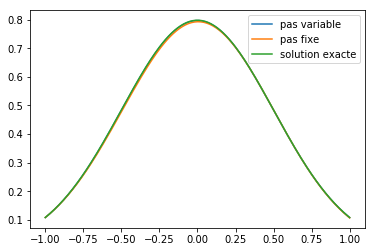

In [81]:
sigma = 0.5

def h(x,t):
    return ((-t/sigma**2)*x)

def gauss(t):
    return np.exp(-t**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

ts, xs = solve_ivp_euler_explicit_variable_step_t(h, -1,np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 1)
t1,x1 = solve_euler_explicit(h, np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 0.01, -1, 1)

plt.plot(ts, xs, label = 'pas variable')
plt.plot(t1, x1, label = 'pas fixe')
plt.plot(ts, gauss(ts), label = 'solution exacte')
plt.legend()

Pour un $\sigma$ assez grand, la gaussienne est peu condensée, les deux méthodes sont relativement équivalentes.

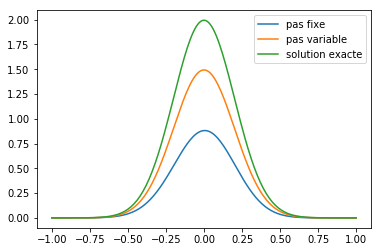

In [82]:
sigma = 0.2

ts, xs = solve_ivp_euler_explicit_variable_step_t(h, -1,np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 1)
t1,x1 = solve_euler_explicit(h, np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 0.01, -1, 1)

plt.plot(t1, x1, label = 'pas fixe')
plt.plot(ts, xs, label = 'pas variable')
plt.plot(ts, gauss(ts), label = 'solution exacte')
plt.legend()

Pour un $\sigma$ légèrement plus faible, on voit que l'adaptation du pas est bénéfique, permet de mieux approcher la solution.

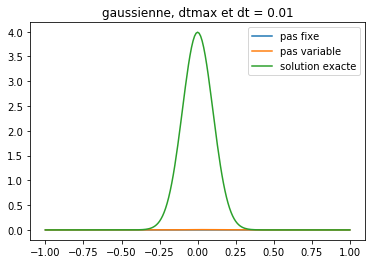

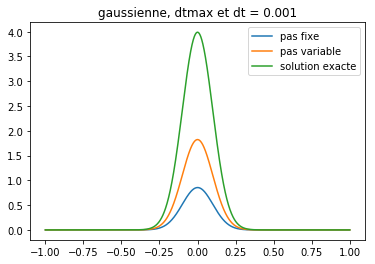

In [84]:
sigma = 0.1

#dtmax de 0.01
ts, xs = solve_ivp_euler_explicit_variable_step_t(h, -1,np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 1, dtmax = 0.01)
t1,x1 = solve_euler_explicit(h, np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 0.01, -1, 1)

plt.plot(t1, x1, label = 'pas fixe')
plt.plot(ts, xs, label = 'pas variable')
plt.plot(ts, gauss(ts), label = 'solution exacte')
plt.legend()
plt.title('gaussienne, dtmax et dt = 0.01')
plt.show() 

#dtmax de 0.001
ts, xs = solve_ivp_euler_explicit_variable_step_t(h, -1,np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 1, dtmax = 0.001)
t1,x1 = solve_euler_explicit(h, np.exp(-1/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)) , 0.001, -1, 1)

plt.plot(t1, x1, label = 'pas fixe')
plt.plot(ts, xs, label = 'pas variable')
plt.plot(ts, gauss(ts), label = 'solution exacte')
plt.legend()
plt.title('gaussienne, dtmax et dt = 0.001')

Ainsi, pour les dtmax et dt par défaut, la gaussienne d'écart type $\sigma = 0.1$ n'est pas du tout approximée par les solveurs : il faut donc les adapter au problème pour en avoir une estimation, estimation sur laquelle le pas variable est plus précis.  

Ce qui est intéressant dans cet exemple, c'est qu'il nous montre que même avec un algorithme de pas variable, si l'on a _a priori_ aucune information précise sur la solution que l'on cherche à approximer, on peut totalement la manquer avec une estimation trop grossière : comme pour le pas fixe, il faut quand même une certaine connaissance de la solution que l'on cherche.

$-$ Équation différentielle d'ordre supérieur :  

En adaptant l'algorithme, on aurait aussi pu l'appliquer à une équation différentielle d'ordre supérieur, en ramenant l'équation à une équation d'ordre 1 dans un espace de départ et d'arrivée de plus grande dimension.  

Certaines fonctions solutions de telles équations peuvent être intéressantes à étudier avec un pas variable, de par leur caractère très oscillant.  
Par exemple, on peut penser à la fonction $\ell: t \to \sin(\frac{1}{t})$ sur un intervalle de $ \mathbb{R}_{+}^{*}$, qui est solution de l'équation différentielle  
$y'' + \frac{2}{t} y' - \frac{1}{t^4} y = 0$.

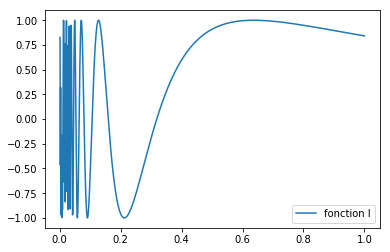

In [23]:
T = np.linspace(0.001, 1, 1000) # intervalle [0.001, 1]

def l(t):
    return np.sin(1/t)
plt.plot(T, l(T), label = 'fonction l')
plt.legend()

Dans ce type de cas, un pas variable semble nécessaire.